DATA UNDERSTANDING


Dataset Shape: (2502, 10)

Data Types:
User_ID                       float64
Age                           float64
Gender                         object
Platform                       object
Daily_Usage_Time (minutes)    float64
Posts_Per_Day                 float64
Likes_Received_Per_Day        float64
Comments_Received_Per_Day     float64
Messages_Sent_Per_Day         float64
Dominant_Emotion               object
dtype: object

Basic Statistics:
           User_ID          Age  Daily_Usage_Time (minutes)  Posts_Per_Day  \
count  1250.000000  1251.000000                 1251.000000    1251.000000   
mean    500.623200    27.469225                   95.326938       3.308553   
std     287.947461     3.901340                   39.040689       1.926426   
min       1.000000    21.000000                   30.000000       1.000000   
25%     249.250000    24.000000                   65.000000       2.000000   
50%     498.500000    27.000000                   85.000000       3.000000   
7

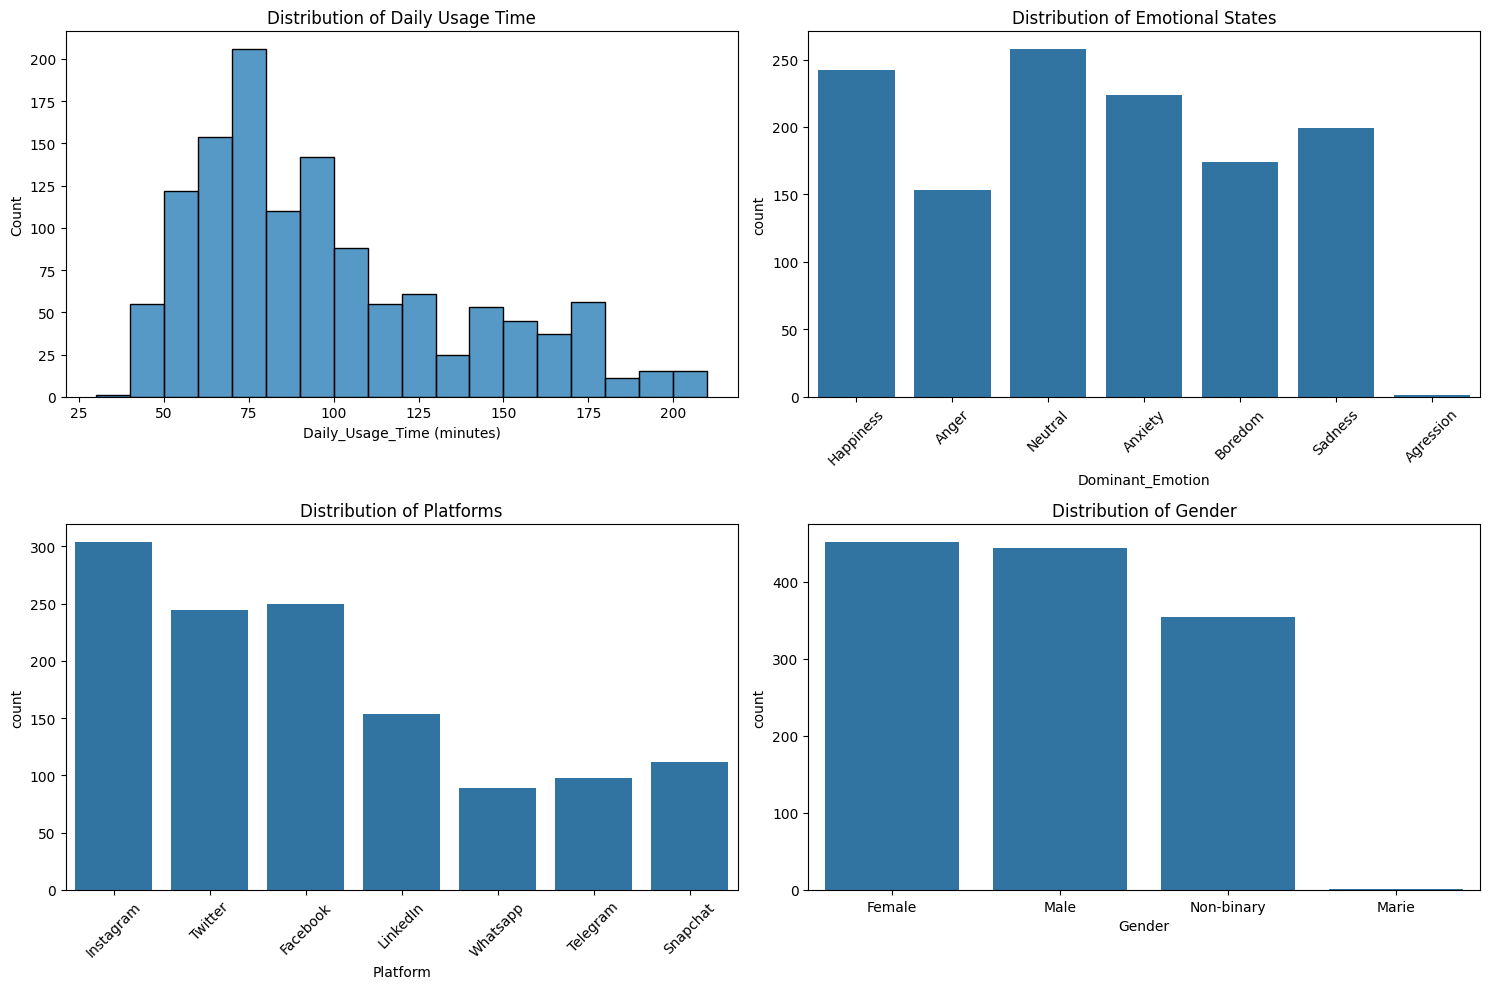

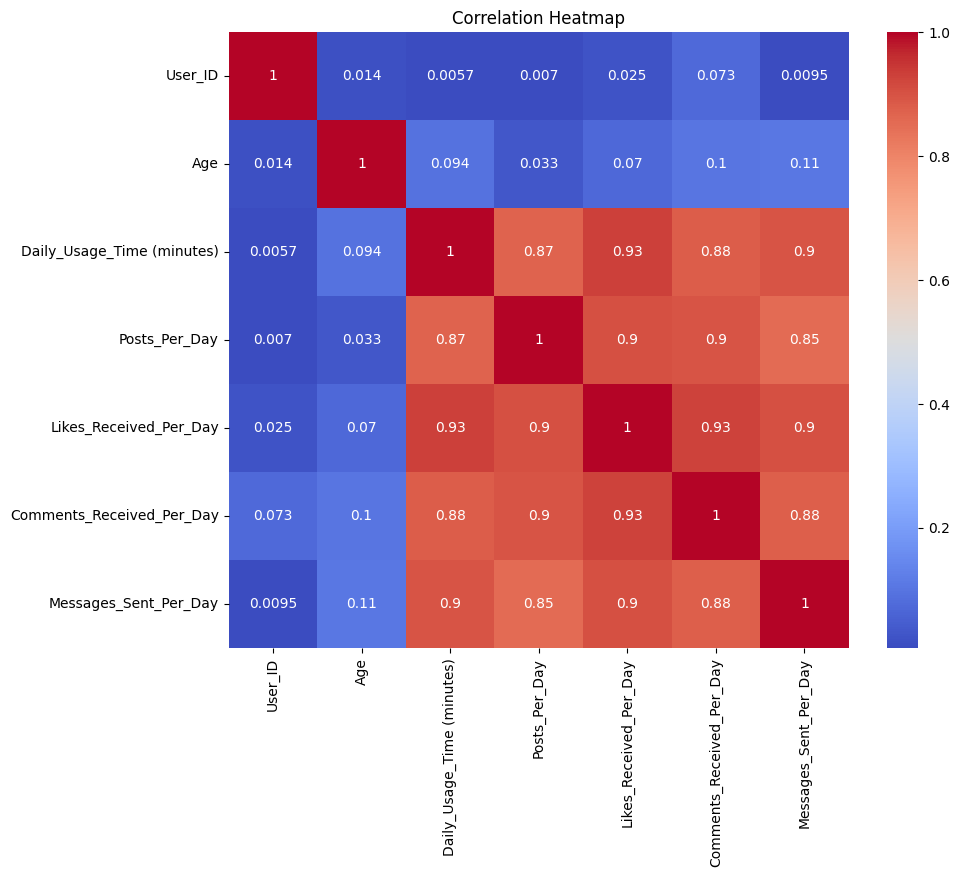

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load datasets
train_df = pd.read_csv('/content/train.csv')
test_df = pd.read_csv('/content/test.csv')
val_df = pd.read_csv('/content/val.csv')

# Combine datasets
df = pd.concat([train_df, test_df, val_df], ignore_index=True)

# Basic data exploration
print("\nDataset Shape:", df.shape)
print("\nData Types:")
print(df.dtypes)
print("\nBasic Statistics:")
print(df.describe())
print("\nMissing Values:")
print(df.isnull().sum())

# Visualize distributions
plt.figure(figsize=(15, 10))

# Usage time distribution
plt.subplot(2, 2, 1)
sns.histplot(data=df, x='Daily_Usage_Time (minutes)')
plt.title('Distribution of Daily Usage Time')

# Emotional state distribution
plt.subplot(2, 2, 2)
sns.countplot(data=df, x='Dominant_Emotion')
plt.xticks(rotation=45)
plt.title('Distribution of Emotional States')

# Platform distribution
plt.subplot(2, 2, 3)
sns.countplot(data=df, x='Platform')
plt.xticks(rotation=45)
plt.title('Distribution of Platforms')

# Gender distribution
plt.subplot(2, 2, 4)
sns.countplot(data=df, x='Gender')
plt.title('Distribution of Gender')

plt.tight_layout()
plt.show()

# Correlation analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

DATA PREPROCESSING

In [4]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np

# Data Cleaning
def clean_data(df):
    # Create a copy of the DataFrame to avoid warnings
    df_clean = df.copy()

    # Remove duplicates
    df_clean = df_clean.drop_duplicates()

    # Handle missing values
    numeric_imputer = SimpleImputer(strategy='median')
    categorical_imputer = SimpleImputer(strategy='most_frequent')

    numeric_cols = df_clean.select_dtypes(include=[np.number]).columns
    categorical_cols = df_clean.select_dtypes(exclude=[np.number]).columns

    # Use loc for assignment
    df_clean.loc[:, numeric_cols] = numeric_imputer.fit_transform(df_clean[numeric_cols])
    df_clean.loc[:, categorical_cols] = categorical_imputer.fit_transform(df_clean[categorical_cols])

    return df_clean

# Feature Engineering
def engineer_features(df):
    # Create a copy of the DataFrame
    df_eng = df.copy()

    # Create engagement ratio
    df_eng.loc[:, 'Engagement_Ratio'] = (
        (df_eng['Likes_Received_Per_Day'] + df_eng['Comments_Received_Per_Day']) /
        df_eng['Posts_Per_Day'].replace(0, 1)  # Avoid division by zero
    )

    # Create usage intensity score
    df_eng.loc[:, 'Usage_Intensity'] = (
        df_eng['Daily_Usage_Time (minutes)'] * df_eng['Posts_Per_Day']
    ) / 60

    # Create social activity score
    df_eng.loc[:, 'Social_Activity'] = (
        df_eng['Messages_Sent_Per_Day'] + df_eng['Posts_Per_Day']
    )

    return df_eng

# Data Transformation
def transform_data(df):
    # Create a copy of the DataFrame
    df_trans = df.copy()

    # Label encoding for categorical variables
    le = LabelEncoder()
    categorical_cols = ['Gender', 'Platform', 'Dominant_Emotion']

    for col in categorical_cols:
        df_trans.loc[:, col] = le.fit_transform(df_trans[col])

    # Normalization
    scaler = StandardScaler()
    numeric_cols = df_trans.select_dtypes(include=[np.number]).columns
    df_trans.loc[:, numeric_cols] = scaler.fit_transform(df_trans[numeric_cols])

    return df_trans, scaler

# Apply preprocessing steps
df_cleaned = clean_data(df)
df_engineered = engineer_features(df_cleaned)
df_transformed, scaler = transform_data(df_engineered)

# Add these after the preprocessing steps to verify the results
print("\nShape after cleaning:", df_cleaned.shape)
print("\nColumns after engineering:", df_engineered.columns.tolist())
print("\nSample of transformed numerical data:\n", df_transformed.head())


Shape after cleaning: (1082, 10)

Columns after engineering: ['User_ID', 'Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)', 'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day', 'Messages_Sent_Per_Day', 'Dominant_Emotion', 'Engagement_Ratio', 'Usage_Intensity', 'Social_Activity']

Sample of transformed numerical data:
     User_ID       Age Gender Platform  Daily_Usage_Time (minutes)  \
0 -0.003419 -0.129406      0        1                   -0.287067   
1 -1.731061 -0.639488      0        1                    0.601541   
3 -1.727581  0.635716      1        5                   -0.160123   
5 -1.724101 -1.404610      3        0                   -0.921788   
7 -1.720622  0.125635      0        1                    2.632647   

   Posts_Per_Day  Likes_Received_Per_Day  Comments_Received_Per_Day  \
0      -0.190278               -0.268397                  -0.183066   
1      -0.190278                0.185302                  -0.639729   
3       0.841708        

DATA MINING

Unique emotions: [4 1 5 2 3 6 0]

Feature Statistics:
                Age  Daily_Usage_Time (minutes)  Posts_Per_Day  \
count  1.082000e+03                1.082000e+03   1.082000e+03   
mean   1.998812e-16                1.736134e-16   5.171464e-17   
std    1.000462e+00                1.000462e+00   1.000462e+00   
min   -1.659650e+00               -1.683453e+00  -1.222265e+00   
25%   -8.945282e-01               -7.948438e-01  -7.062718e-01   
50%   -1.294061e-01               -2.870674e-01  -1.902785e-01   
75%    8.907568e-01                6.015415e-01   8.417081e-01   
max    1.910920e+00                2.886536e+00   3.421674e+00   

       Likes_Received_Per_Day  Comments_Received_Per_Day  \
count            1.082000e+03               1.082000e+03   
mean            -1.149214e-16               5.910245e-17   
std              1.000462e+00               1.000462e+00   
min             -1.327028e+00              -1.553054e+00   
25%             -7.599043e-01              -8.68060

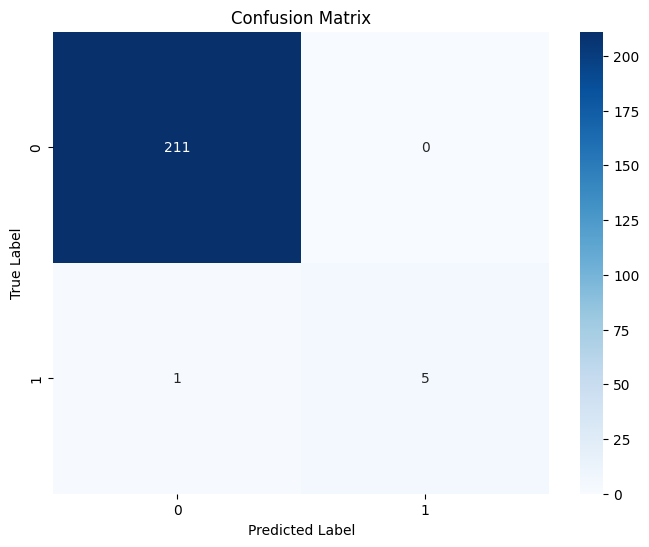

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Define addiction risk based on usage patterns and engagement
def calculate_addiction_risk(row):
    risk_score = 0

    # Risk factors
    if row['Daily_Usage_Time (minutes)'] > 120:  # More than 2 hours daily
        risk_score += 1
    if row['Usage_Intensity'] > 2:  # High intensity of use
        risk_score += 1
    if row['Engagement_Ratio'] > 10:  # High engagement seeking
        risk_score += 1
    if row['Social_Activity'] > 30:  # High social activity
        risk_score += 1

    # Check emotion directly (since it's already encoded)
    negative_emotions = [0, 4, 6]  # Encoded values for Anxiety, Sadness, and Anger
    if row['Dominant_Emotion'] in negative_emotions:
        risk_score += 1

    return 1 if risk_score >= 2 else 0  # 1 for high risk, 0 for low risk

# Let's first check the unique values in Dominant_Emotion
print("Unique emotions:", df_transformed['Dominant_Emotion'].unique())

# Add target variable
df_transformed['Addiction_Risk'] = df_transformed.apply(calculate_addiction_risk, axis=1)

# Define features and target
features = ['Age', 'Gender', 'Platform', 'Daily_Usage_Time (minutes)',
           'Posts_Per_Day', 'Likes_Received_Per_Day', 'Comments_Received_Per_Day',
           'Messages_Sent_Per_Day', 'Dominant_Emotion', 'Engagement_Ratio',
           'Usage_Intensity', 'Social_Activity']

X = df_transformed[features]
y = df_transformed['Addiction_Risk']

# Print basic statistics about the features
print("\nFeature Statistics:")
print(X.describe())

# Print distribution of target variable
print("\nTarget Distribution:")
print(y.value_counts(normalize=True))

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Define parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get best model
best_model = grid_search.best_estimator_

# Print model performance
print("\nBest Parameters:", grid_search.best_params_)
print("\nBest Score:", grid_search.best_score_)

# Make predictions on test set
y_pred = best_model.predict(X_test)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Create confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

EVALUATION AND INTERPRETATION


=== Model Performance Evaluation ===

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       211
           1       1.00      0.83      0.91         6

    accuracy                           1.00       217
   macro avg       1.00      0.92      0.95       217
weighted avg       1.00      1.00      1.00       217



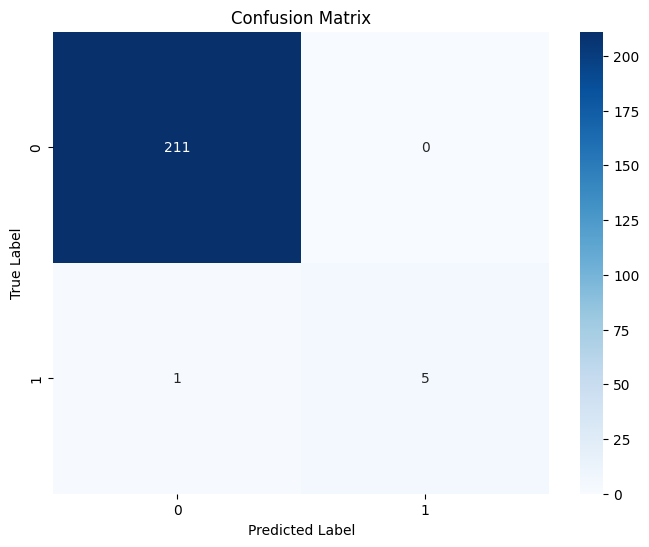

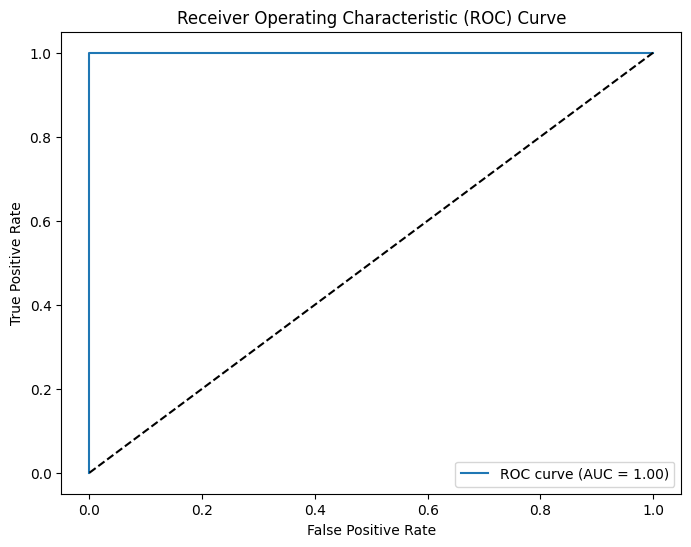

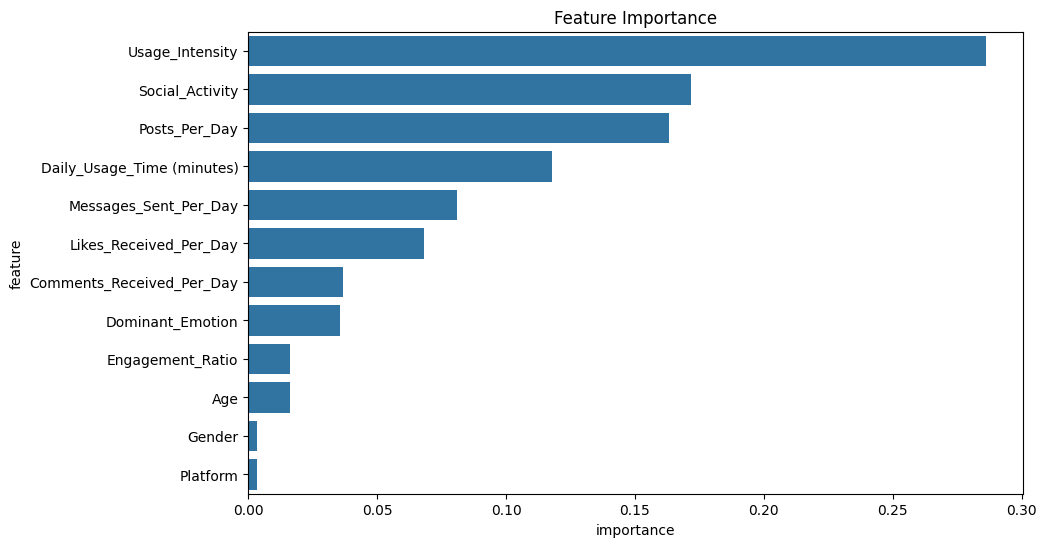


Cross-validation scores: [1.         1.         1.         1.         0.99421965]
Average CV score: 0.999 (+/- 0.005)

Model and artifacts saved successfully.

=== Sample Prediction ===

=== Social Media Usage Assessment ===

Risk Level: Low
Risk Probability: 0.00

Personalized Recommendations:
1. Maintain Healthy Habits:
   - Continue balanced usage patterns
   - Regular self-monitoring of time spent

2. Preventive Measures:
   - Set boundaries for usage
   - Stay aware of emotional responses

3. Positive Practices:
   - Engage in meaningful online interactions
   - Balance online and offline activities


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


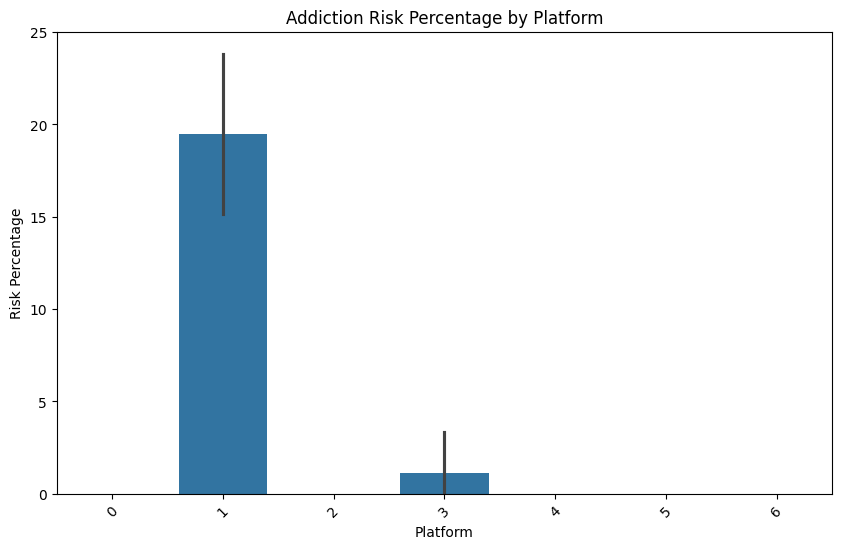

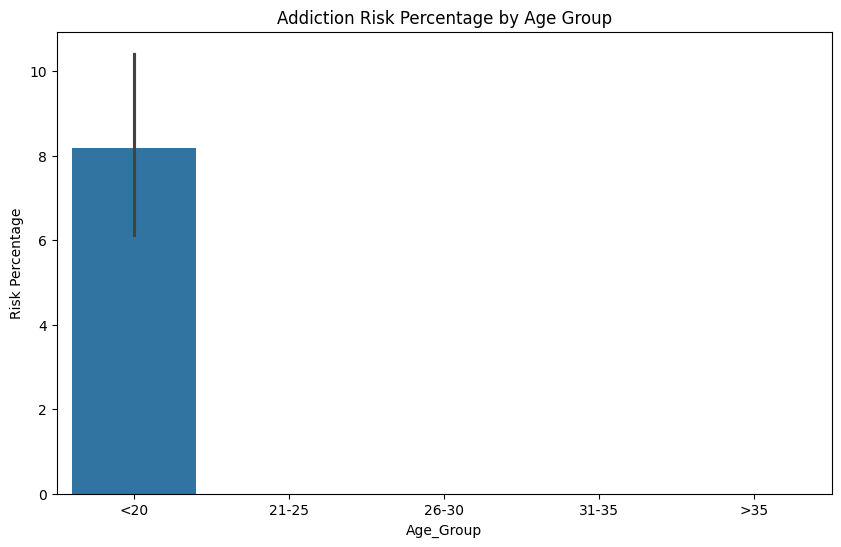

In [9]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score

def evaluate_model(model, X_train, X_test, y_train, y_test, features):
    # Make predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    print("\n=== Model Performance Evaluation ===")

    # 1. Classification Report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # 2. Confusion Matrix
    plt.figure(figsize=(8, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # 3. ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

    # 4. Feature Importance Analysis
    feature_importance = pd.DataFrame({
        'feature': features,
        'importance': model.feature_importances_
    }).sort_values('importance', ascending=False)

    plt.figure(figsize=(10, 6))
    sns.barplot(x='importance', y='feature', data=feature_importance)
    plt.title('Feature Importance')
    plt.show()

    # 5. Cross-validation scores
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    print("\nCross-validation scores:", cv_scores)
    print(f"Average CV score: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")

    return feature_importance

# Perform evaluation
importance_df = evaluate_model(best_model, X_train, X_test, y_train, y_test, features)

# Create recommendation system
def get_personalized_recommendations(user_data, model, feature_importance):
    risk_level = model.predict([user_data])[0]
    risk_prob = model.predict_proba([user_data])[0][1]

    print("\n=== Social Media Usage Assessment ===")
    print(f"\nRisk Level: {'High' if risk_level == 1 else 'Low'}")
    print(f"Risk Probability: {risk_prob:.2f}")

    # Analyze contributing factors
    user_features = pd.DataFrame([user_data], columns=features)
    high_risk_factors = []

    # Check top contributing features
    for feature in feature_importance['feature'].head():
        feature_value = user_features[feature].iloc[0]
        if feature in ['Daily_Usage_Time (minutes)', 'Usage_Intensity', 'Social_Activity']:
            if feature_value > user_features[feature].mean():
                high_risk_factors.append(f"{feature}: {feature_value:.1f}")

    if high_risk_factors:
        print("\nKey Risk Factors:")
        for factor in high_risk_factors:
            print(f"- {factor}")

    # Personalized recommendations
    recommendations = {
        'High Risk': [
            "1. Time Management:",
            "   - Set daily time limits for social media use",
            "   - Use app blockers during specific hours",
            "   - Take regular digital detox breaks",
            "\n2. Engagement Patterns:",
            "   - Reduce passive scrolling",
            "   - Focus on meaningful interactions",
            "   - Limit post frequency",
            "\n3. Emotional Well-being:",
            "   - Practice mindful social media use",
            "   - Engage in offline activities",
            "   - Consider professional support if needed",
            "\n4. Practical Steps:",
            "   - Turn off non-essential notifications",
            "   - Use grayscale mode on devices",
            "   - Keep devices away during meals and sleep"
        ],
        'Low Risk': [
            "1. Maintain Healthy Habits:",
            "   - Continue balanced usage patterns",
            "   - Regular self-monitoring of time spent",
            "\n2. Preventive Measures:",
            "   - Set boundaries for usage",
            "   - Stay aware of emotional responses",
            "\n3. Positive Practices:",
            "   - Engage in meaningful online interactions",
            "   - Balance online and offline activities"
        ]
    }

    print("\nPersonalized Recommendations:")
    for rec in recommendations['High Risk' if risk_level == 1 else 'Low Risk']:
        print(rec)

# Save the model and related artifacts
import joblib

model_artifacts = {
    'model': best_model,
    'scaler': scaler,
    'feature_importance': importance_df,
    'features': features
}

joblib.dump(model_artifacts, 'social_media_addiction_model.joblib')
print("\nModel and artifacts saved successfully.")

# Example usage with a sample user
print("\n=== Sample Prediction ===")
sample_user = X_test.iloc[0]
get_personalized_recommendations(sample_user, best_model, importance_df)

# Additional Analysis - Platform-wise Risk Distribution
platform_risk = pd.DataFrame({
    'Platform': df_transformed['Platform'],
    'Risk': df_transformed['Addiction_Risk']
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Platform', y='Risk', data=platform_risk, estimator=lambda x: len(x[x == 1]) / len(x) * 100)
plt.title('Addiction Risk Percentage by Platform')
plt.ylabel('Risk Percentage')
plt.xticks(rotation=45)
plt.show()

# Age Group Analysis
df_transformed['Age_Group'] = pd.cut(df_transformed['Age'],
                                   bins=[0, 20, 25, 30, 35, 100],
                                   labels=['<20', '21-25', '26-30', '31-35', '>35'])

age_risk = pd.DataFrame({
    'Age_Group': df_transformed['Age_Group'],
    'Risk': df_transformed['Addiction_Risk']
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Age_Group', y='Risk', data=age_risk, estimator=lambda x: len(x[x == 1]) / len(x) * 100)
plt.title('Addiction Risk Percentage by Age Group')
plt.ylabel('Risk Percentage')
plt.show()